In [ ]:
# Variance Transmission Investigation
library(ggplot2)

In [ ]:
df = read.csv('Search For Cause 1.csv')

In [ ]:
# View of Data
head(df)

,daycount,shift,partnum,y100,y200,y300
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,11,1,14670,-3.0,-3.0,-0.2
2,11,1,14698,3.2,3.4,6.0
3,11,2,15230,-5.4,-2.8,-1.8
4,11,2,15326,-1.6,0.4,-1.4
5,11,3,15452,1.0,-0.8,1.2
6,11,3,15614,-1.6,-2.4,-2.0


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


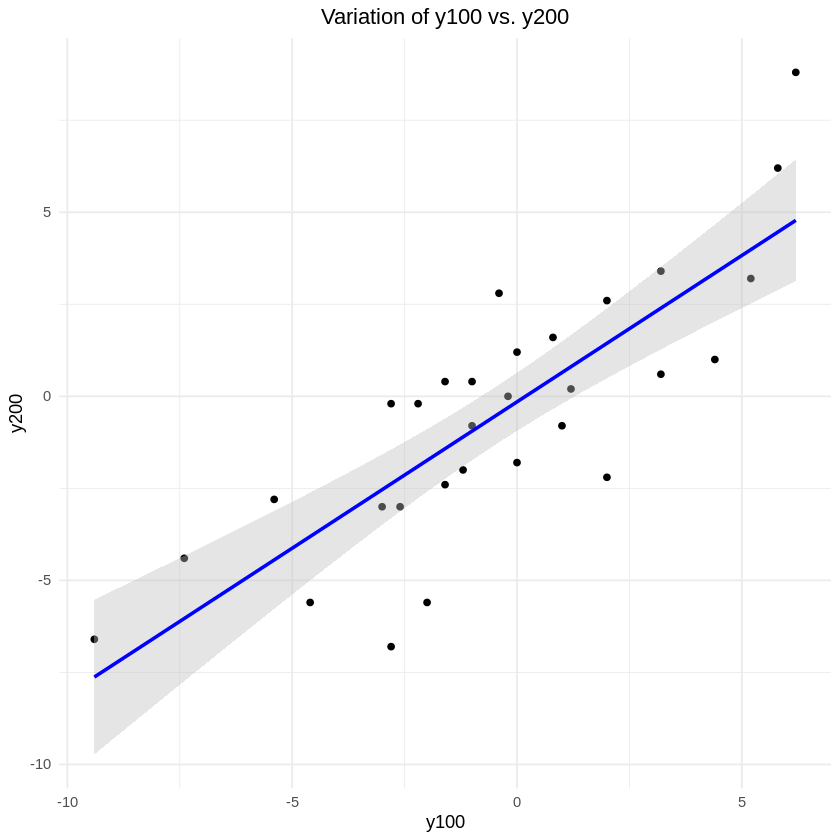

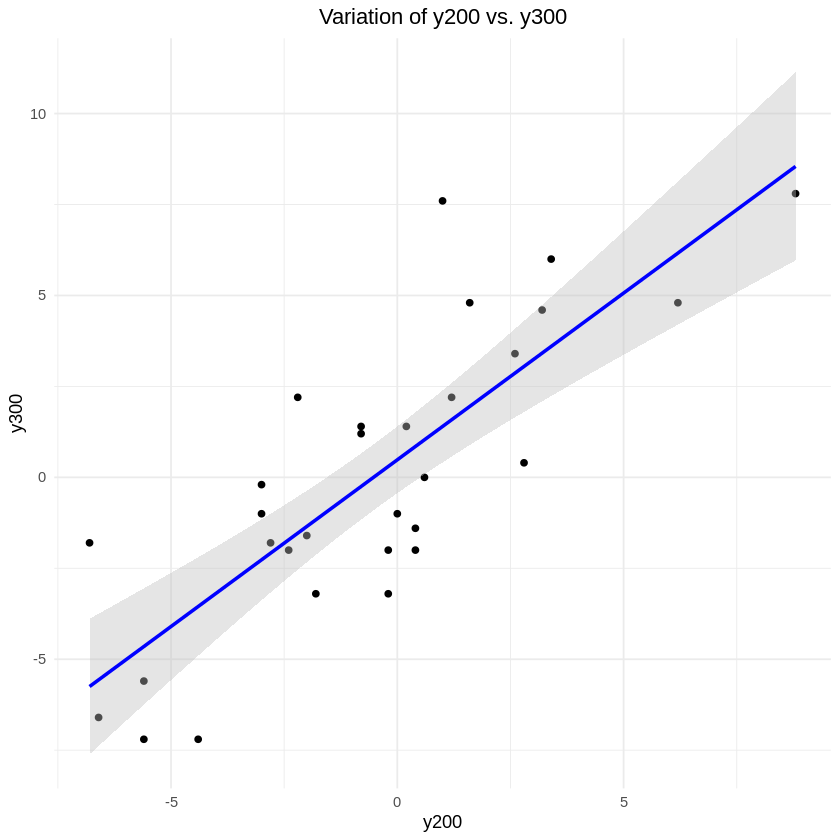

In [ ]:
# Create the first plot
plot1 <- ggplot(df, aes(x=y100, y=y200)) +
  geom_point() +
  geom_smooth(method='lm', color='blue', fill='grey') +
  labs(title='Variation of y100 vs. y200') +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Create the second plot
plot2 <- ggplot(df, aes(x=y200, y=y300)) +
  geom_point() +
  geom_smooth(method='lm', color='blue', fill='grey') +
  labs(title='Variation of y200 vs. y300') +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Create the third plot
plot3 <- ggplot(df, aes(x=y100, y=y300)) +
  geom_point() +
  geom_smooth(method='lm', color='blue', fill='grey') +
  labs(title='Variation of y100 vs. y300') +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Output the plots
print(plot1)
print(plot2)


In [ ]:
# Linear regression analysis comparing y100 and y200 variables
model <- lm(y200 ~ y100, data = df)

# Calculate standard error of the model's residuals
model_se <- sigma(model)

# Calculate standard deviation of the y200 variable
y200_sd <- sd(df$y200)

# Compute and report the ratio of the corrected standard deviation of y200 to its original standard deviation
# This ratio adjusts for the model's error and provides insight into the variance explained by the model
ratio <- sqrt((y200_sd^2 - model_se^2) / y200_sd^2)
# Include the calculated ratio in the report

# Perform ANOVA to assess the significance of the model
anova_results <- anova(model)
# Review the ANOVA table to understand the model's explanatory power and variable significance


print(paste("Sigma: ", round(model_se, digits = 4)))
print(paste("SD y300: ", round(y200_sd, digits = 4)))
print(paste("Ratio: ", round(ratio, digits = 4)))
summary(model)
anova_results

[1] "Sigma:  2.0927"
[1] "SD y300:  3.5555"
[1] "Ratio:  0.8084"



Call:
lm(formula = y200 ~ y100, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4231 -1.3281  0.2274  1.5638  4.0198 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.1503     0.3854  -0.390      0.7    
y100          0.7952     0.1065   7.464 3.95e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.093 on 28 degrees of freedom
Multiple R-squared:  0.6655,	Adjusted R-squared:  0.6536 
F-statistic: 55.71 on 1 and 28 DF,  p-value: 3.954e-08


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
y100,1,243.9797,243.979739,55.71271,3.95388e-08
Residuals,28,122.6189,4.379247,NA,NA


In [ ]:
# Load necessary libraries
library(stats)

# Fit linear regression model with y300 as the dependent variable and y200 as the independent variable
model <- lm(y300 ~ y200, data = df)

# Calculate the residual standard error of the model
residual_SE <- sigma(model)

# Calculate the standard deviation of the dependent variable y300
y300_SD <- sd(df$y300)

# Compute the ratio of the square root of the difference between the variance of y300 and the squared residual standard error,
# divided by the standard deviation of y300. This ratio may provide insights into the model's explanatory power beyond the residual error.
ratio <- sqrt(var(df$y300) - residual_SE^2) / y300_SD


# Generate an ANOVA table for the linear regression model to assess the significance of the independent variables
model_anova <- anova(model)

print(paste("Sigma: ", round(residual_SE, digits = 4)))
print(paste("SD y300: ", round(y300_SD, digits = 4)))
print(paste("Ratio: ", round(ratio, digits = 4)))
print(model_anova)
summary(model)


[1] "Sigma:  2.4258"
[1] "SD y300:  4.0374"
[1] "Ratio:  0.7994"
Analysis of Variance Table

Response: y300
          Df Sum Sq Mean Sq F value    Pr(>F)    
y200       1 307.95 307.955  52.334 7.108e-08 ***
Residuals 28 164.76   5.884                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
lm(formula = y300 ~ y200, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6500 -1.8954 -0.2663  1.4046  6.2008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4827     0.4479   1.078     0.29    
y200          0.9165     0.1267   7.234 7.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.426 on 28 degrees of freedom
Multiple R-squared:  0.6515,	Adjusted R-squared:  0.639 
F-statistic: 52.33 on 1 and 28 DF,  p-value: 7.108e-08
